In [16]:
import cv2
from PIL import Image
import torch
import numpy as np

from matplotlib import pyplot as plt

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [17]:
base_options = python.BaseOptions(model_asset_path='models/efficientdet.tflite')
options = vision.ObjectDetectorOptions(base_options=base_options, score_threshold=0.5)
detector = vision.ObjectDetector.create_from_options(options)

I0000 00:00:1716425613.193164   33974 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c


In [18]:
VIDEO_FILEPATH = 'testdata/20210111_DML2387.mp4'

In [19]:
video = cv2.VideoCapture(VIDEO_FILEPATH)
if not video.isOpened():
    raise RuntimeError('Video opening failed')

In [22]:
MARGIN_PT = 10
ROW_SIZE_PT = 10


def visualize(image: np.ndarray, detection_result) -> np.ndarray:
    """Draws bounding boxes on the input image and return it.
    
    Args:
        image: The input RGB image.
        detection_result: the list of all "detection" entities to be visualized.
    Returns:
        Image with bounding boxes.
    """
    print(len(detection_result.detections))
    for detection in detection_result.detections:
        bbox = detection.bounding_box
        start_point = bbox.origin_x, bbox.origin_y
        end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
        cv2.rectangle(image, start_point, end_point, (255, 0, 0), 3)

        print(f'categories = {detection.categories}')
        category = detection.categories[0]
        probability = round(category.score, 2)
        result_text = f'{category.category_name} ({probability})'
        text_location = (MARGIN_PT + bbox.origin_x, MARGIN_PT + ROW_SIZE_PT + bbox.origin_y)
        cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 1)
    
    return image

/home/nikhiljoshi/.local/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1


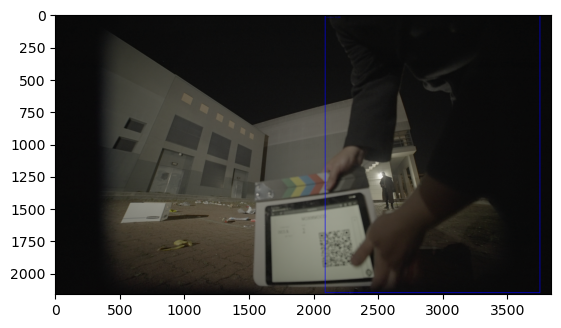

2


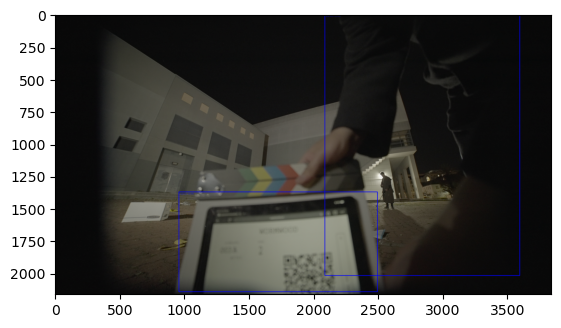

1


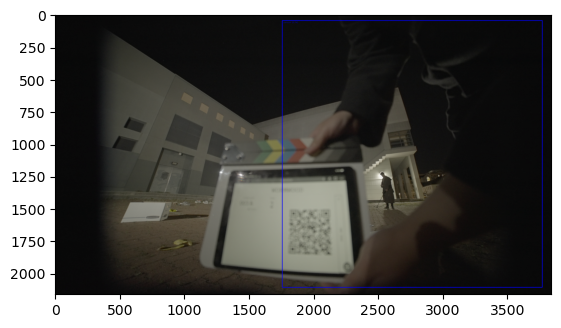

1


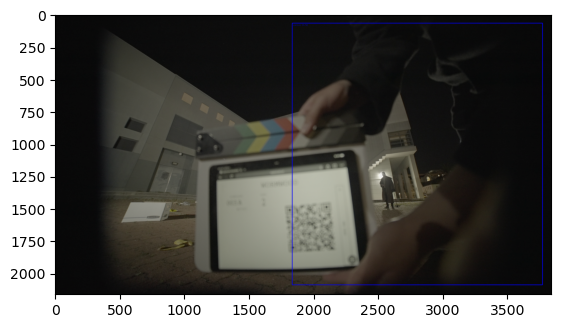

1


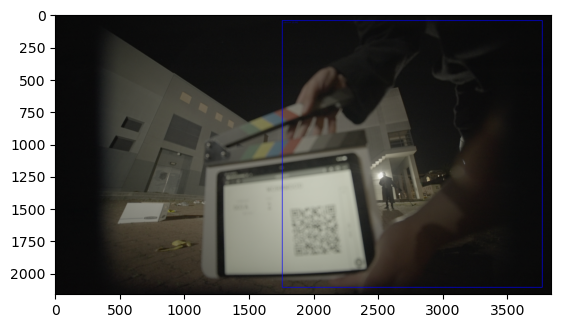

1


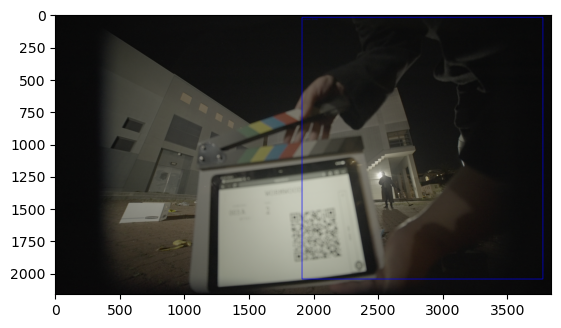

0


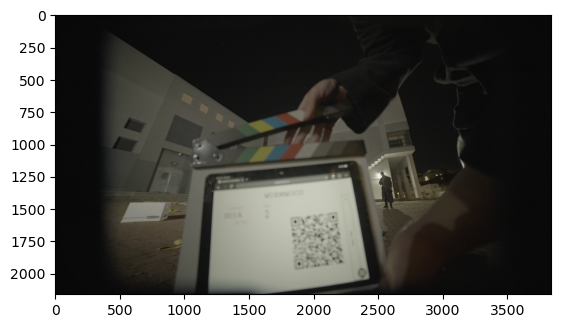

0


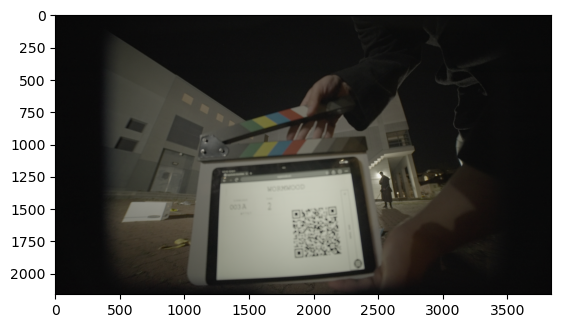

1


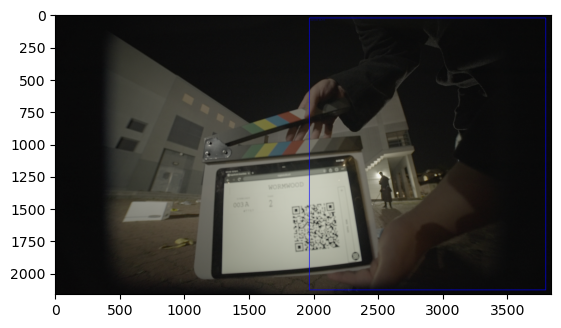

1


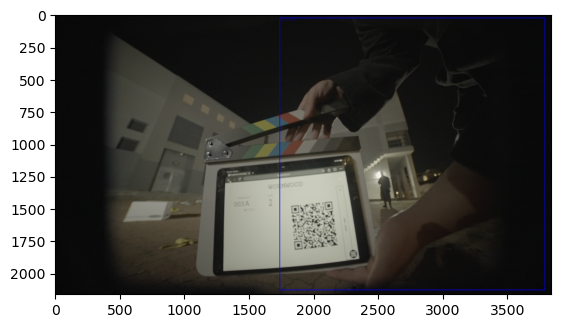

1


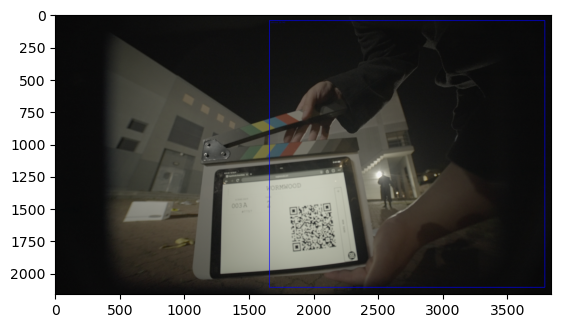

1


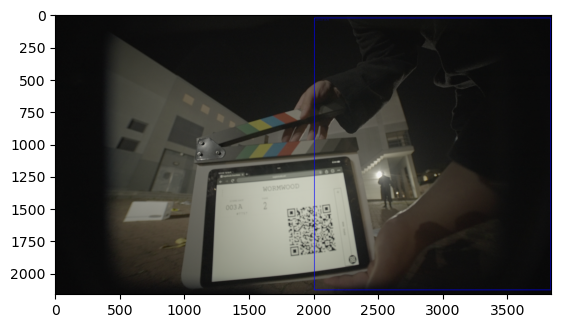

1


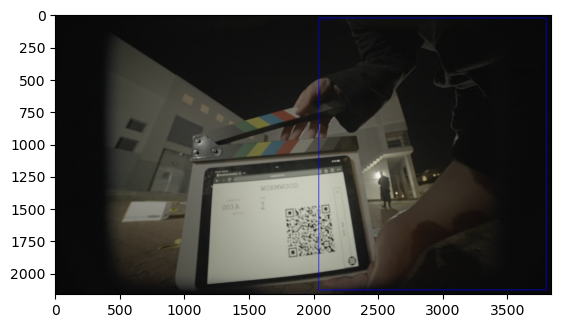

1


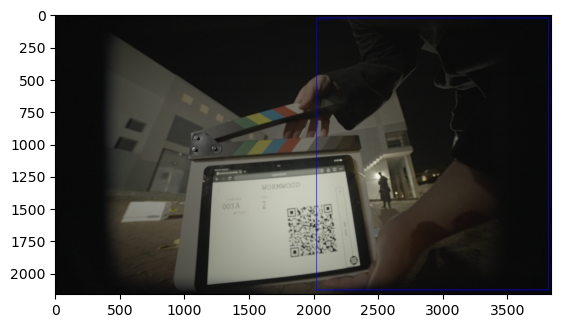

0


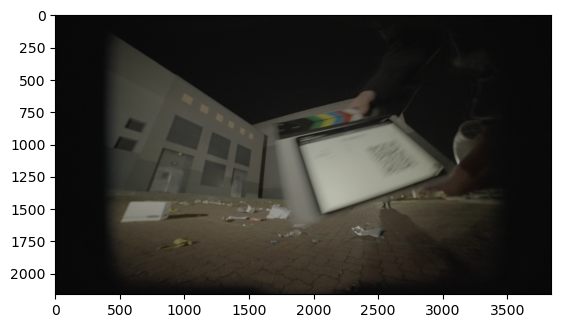

0


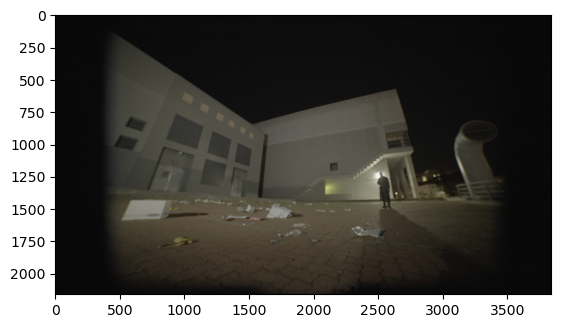

0


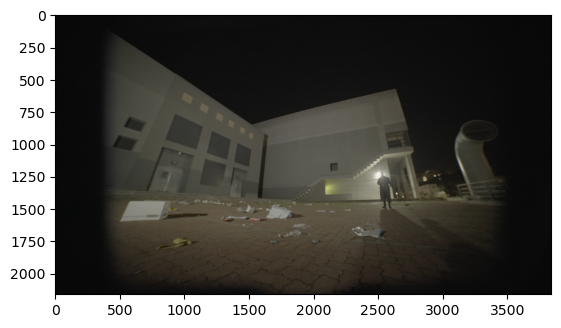

0


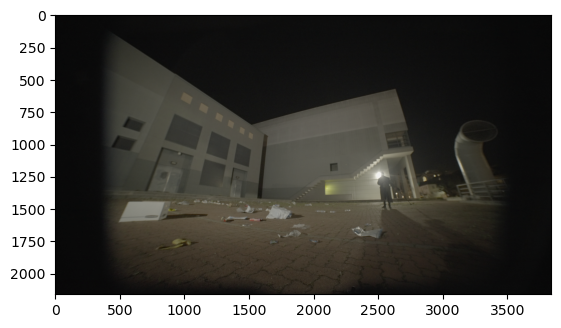

0


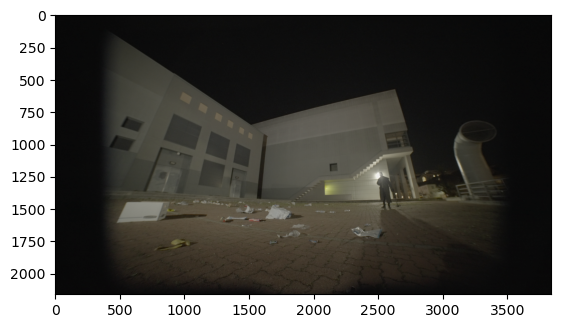

0


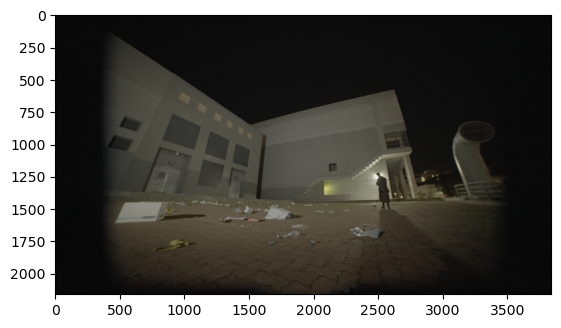

0


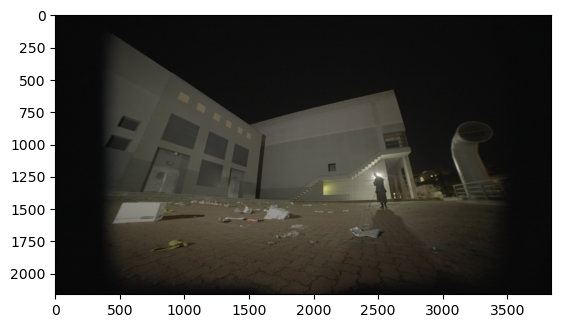

0


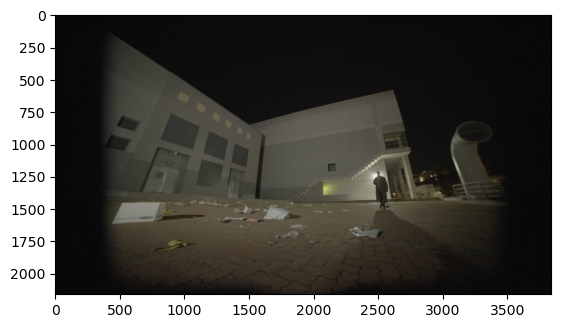

0


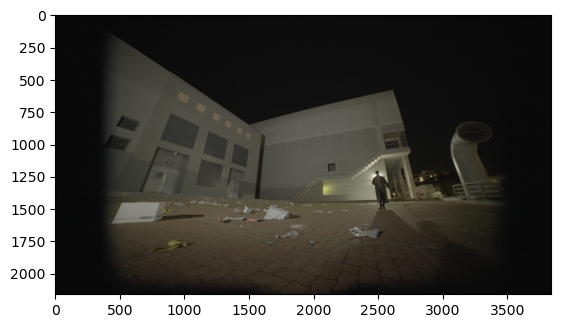

0


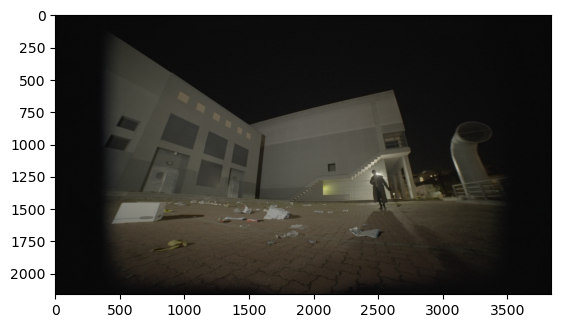

0


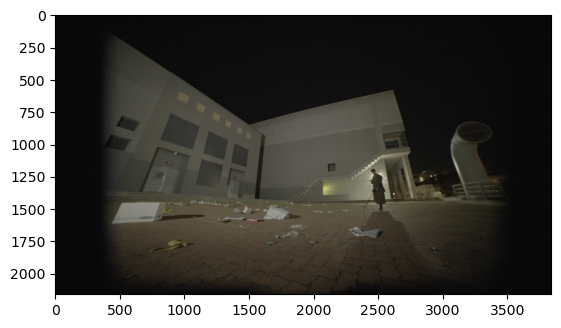

0


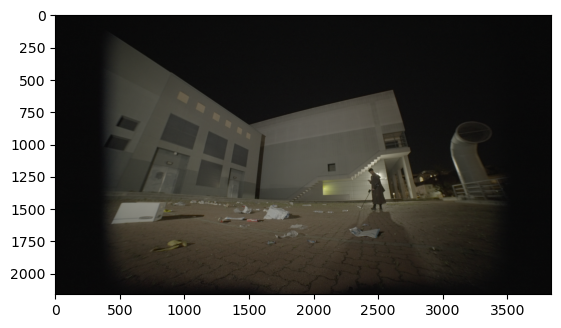

0


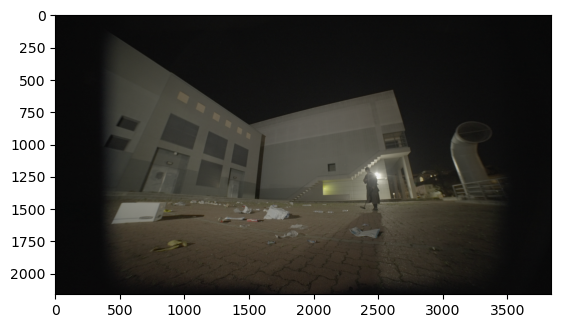

0


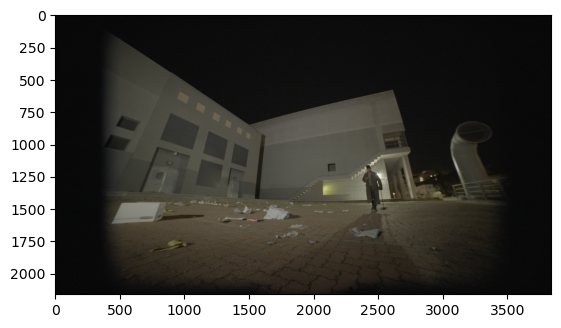

0


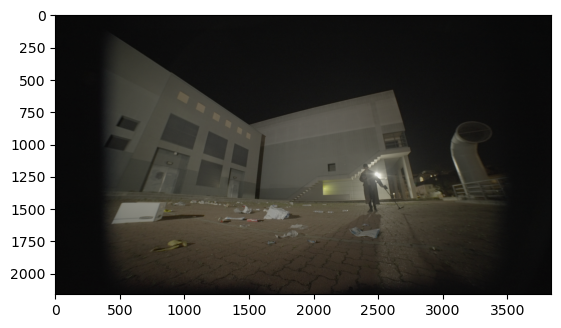

0


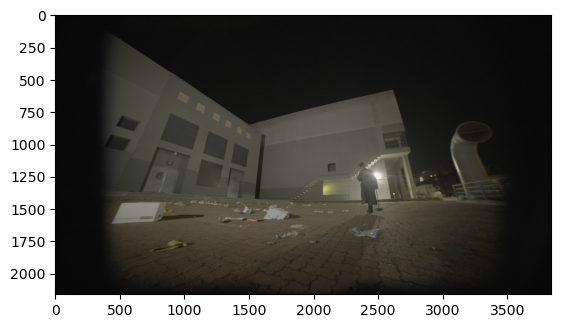

0


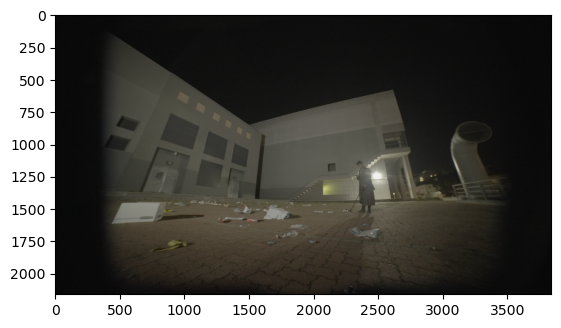

0


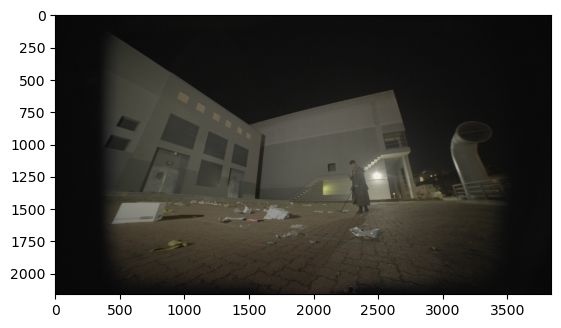

0


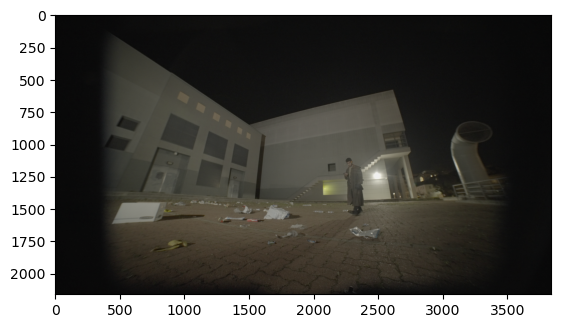

0


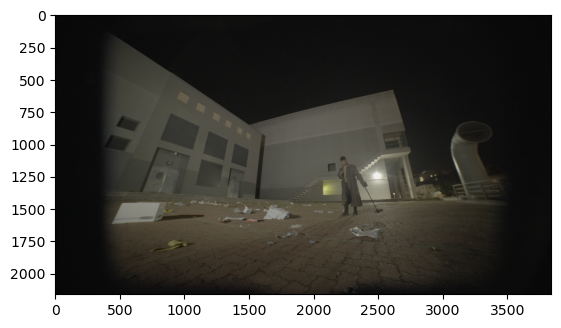

KeyboardInterrupt: 

In [23]:
interesting_images = []
count = 0
step_size = 20
while video.isOpened() and count < 200:
    video.set(cv2.CAP_PROP_POS_FRAMES, count)
    count += step_size
    ret, frame = video.read()
    if not ret: break

    h, w, c = frame.shape
    frame = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame)
    dection_result = detector.detect(frame)

    frame_copy = np.copy(frame.numpy_view())
    annotated_image = visualize(frame_copy, dection_result)
    rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_annotated_image)
    plt.show()

video.release()
cv2.destroyAllWindows()

In [ ]:
s = sorted(interesting_images, key=lambda t: t[1])

In [ ]:
# Print the masked out images.
for t in reversed(s):
    plt.imshow(t[0])
    plt.show()